# 안녕하세요:)

## AIVLE '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [212]:
import pandas as pd

In [213]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [214]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [215]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [216]:
df_seoul_bus_station = pd.read_csv('seoul_bus_station_info.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('seoul_movement_time.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('seoul_people_dong.csv', sep=",", encoding = 'UTF-8')

In [217]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [218]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [219]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   남자                 25 non-null     int64  
 3   여자                 25 non-null     int64  
 4   합계                 25 non-null     int64  
 5   한식 일반 음식점업         25 non-null     object 
 6   한식 일반 음식점업.1       25 non-null     object 
 7   커피전문점              25 non-null     object 
 8   커피전문점.1            25 non-null     object 
 9   일반 교과 학원           25 non-null     object 
 10  일반 교과 학원.1         25 non-null     object 
 11  한식 육류요리 전문점        25 non-null     int64  
 12  한식 육류요리 전문점.1      25 non-null     object 
 13  남녀용 겉옷 및 셔츠 도매업    25 non-null     object 
 14  남녀용 겉옷 및 셔츠 도매업.1  25 non-null     object 
 15  부동산 중개 및 대리업       25 non-null     object 
 16  부동산 중개 및 대리업.1     25 non-nu

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
 - 인구 이동량과 노선 수요의 관계에 대한 가설:
    가설: 인구 이동량이 많은 지역일수록 해당 지역의 노선 수요가 높을 것이다.
    이유: 인구 이동량은 해당 지역의 교통 수요를 나타내며, 이는 총 이동인구와 관련이 있을 것으로 예상된다. 따라서 이동인구(합)이 높은 지역일수록 노선 수요가 높을 것으로 가정할 수 있다.

* 가설 2
 - 음식점 업종과 대중교통 이용량의 관계에 대한 가설:
    가설: 한식 일반 음식점업, 커피전문점, 기타주점업 등의 업종이 많은 지역일수록 해당 지역의 대중교통 이용량이 높을 것이다.
    이유: 음식점이나 카페가 밀집한 지역은 활동량이 높을 가능성이 있으며, 이는 대중교통 이용량과 관련이 있을 것으로 추측된다. 즉, 음식점 업종이 다양하고 밀집한 지역일수록 대중교통 이용량이 높을 것으로 예상된다.

* 가설 3
 - 이동 시간과 노선 수요의 관계에 대한 가설:
    가설: 평균 이동 시간이 긴 지역일수록 해당 지역의 노선 수요가 높을 것이다.
    이유: 이동 시간이 긴 지역은 대중교통이 부족하거나 혼잡한 지역일 가능성이 높다. 이에 따라 대중교통 이용량이 높을 것으로 예상되며, 이는 노선 수요에 영향을 미칠 것으로 가정할 수 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [221]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)
 - 최대 평균 이동시간은 1시간 10문정도 걸리는 것을 파악할 수 있었다. 
 - 위에서 가설을 설정했을 때 평균 이동시간이 길수록 노선의 개수나 버스정류장 개수가 적다면 이동의 불편함이 있기 때문에 고려사항으로 생각해 본다

In [222]:
df[['평균 이동 시간(분)']].describe().T

,count,mean,std,min,25%,50%,75%,max
평균 이동 시간(분),25.0,64.262511,4.2416,58.450528,60.975391,64.032968,67.409332,72.597698


### 2)

In [223]:
df[['이동인구(합)']].describe().T

,count,mean,std,min,25%,50%,75%,max
이동인구(합),25.0,47.605192,13.892997,30.076522,38.834441,42.697635,51.623977,88.589932


### 3)

In [224]:
df[['승차총승객수']].describe().T

,count,mean,std,min,25%,50%,75%,max
승차총승객수,25.0,4110994.4,1.158910e+06,2365355.0,3200879.0,4125466.0,4746623.0,6960336.0


## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [225]:
import scipy.stats as stats
import scipy.stats as spst
import seaborn as sns

In [226]:
target = '정류장수'

In [227]:
target = '노선수'

In [228]:
# 함수 작성
def t_chk(feature, target, data):
    result1, result2 = spst.pearsonr(df[feature], df[target])
    sns.jointplot(x=feature, y=target, data=df, kind='reg')
    plt.grid()
    print(f'상관계수:{result1}, P_value:{result2}')
    plt.grid()
    plt.show()
    

### 1) 인구 이동량이 많은 지역일수록 해당 지역의 노선 수요가 많을 것이다

In [229]:
feature = '이동인구(합)'

상관계수:0.06696238958600599, P_value:0.7504637243839861


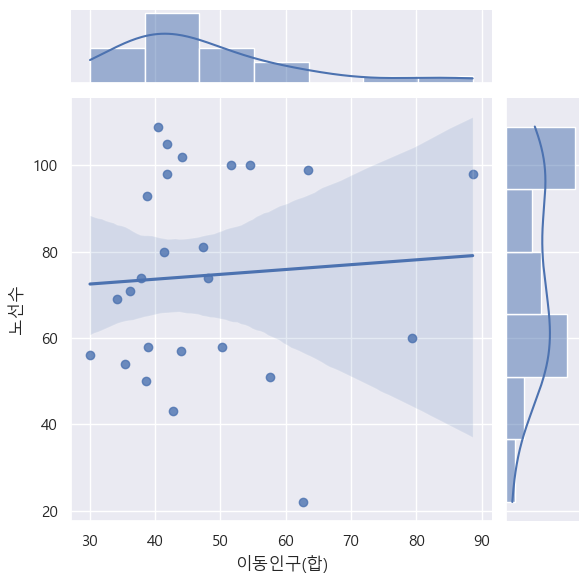

In [230]:
t_chk(feature, target, df)

### 2)

In [231]:
feature = '평균 이동 시간(분)'

상관계수:-0.5708071386080977, P_value:0.0028839388625083113


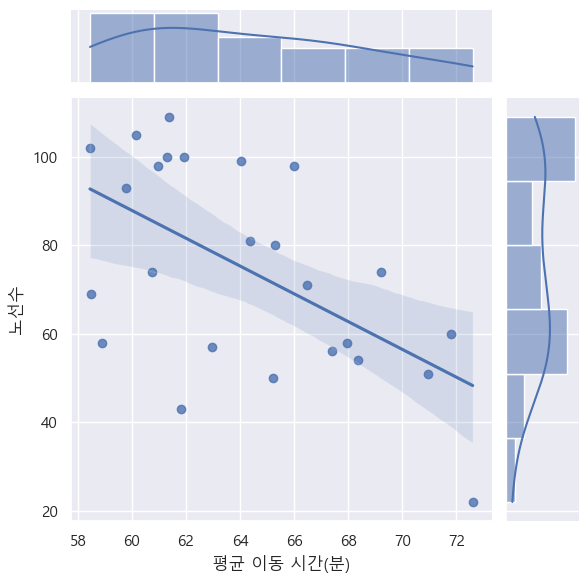

In [232]:
t_chk(feature, target, df)

### 3)

In [233]:
feature = '총 이동 시간'

상관계수:0.3898552463683719, P_value:0.05404259016862269


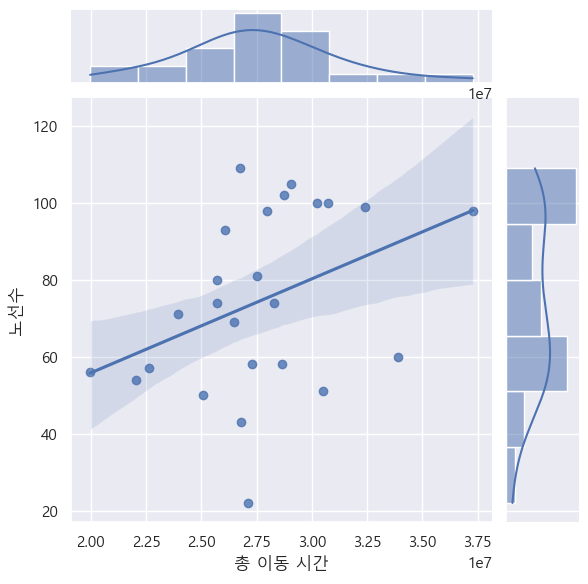

In [234]:
t_chk(feature, target, df)

상관계수:0.4759066764458364, P_value:0.016186867803679693


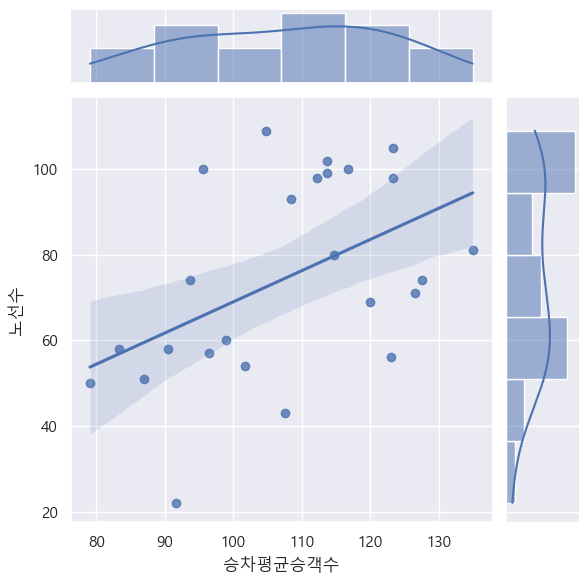

In [235]:
feature = '승차평균승객수'
t_chk(feature, target, df)

상관계수:1.0, P_value:0.0


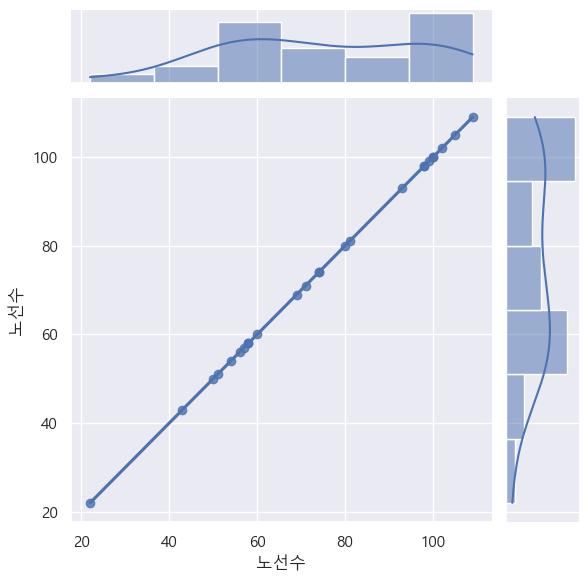

In [236]:
feature = '노선수'
t_chk(feature, target, df)

In [237]:
for column in df.columns[5:17]:
    # 컴마 제거 후 숫자로 변환
    df[column] = df[column].astype(str).str.replace(',', '').astype(float)

상관계수:0.4563275673579189, P_value:0.02185743186823677


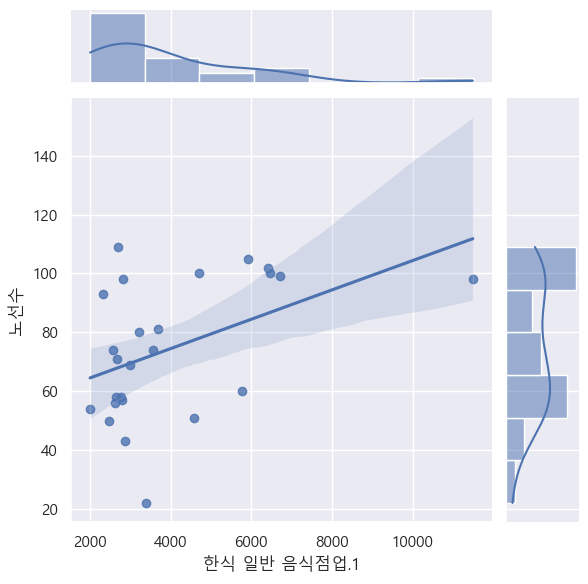

In [238]:
feature = '한식 일반 음식점업.1'
t_chk(feature, target, df)

상관계수:0.4367372205421086, P_value:0.029047285300136633


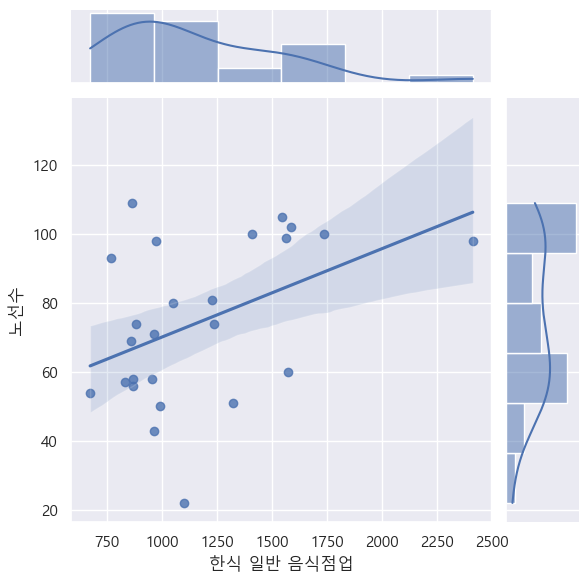

In [239]:
feature = '한식 일반 음식점업'
t_chk(feature, target, df)

상관계수:0.439347800834543, P_value:0.027992114766443116


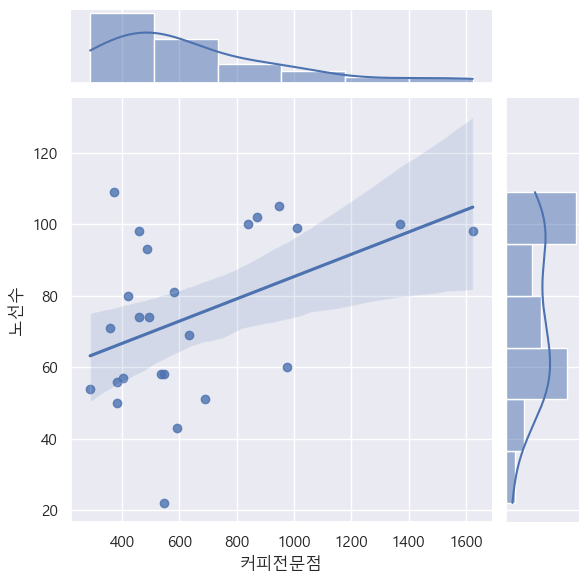

In [240]:
feature = '커피전문점'
t_chk(feature, target, df)

상관계수:0.4585964071175036, P_value:0.021127661115689745


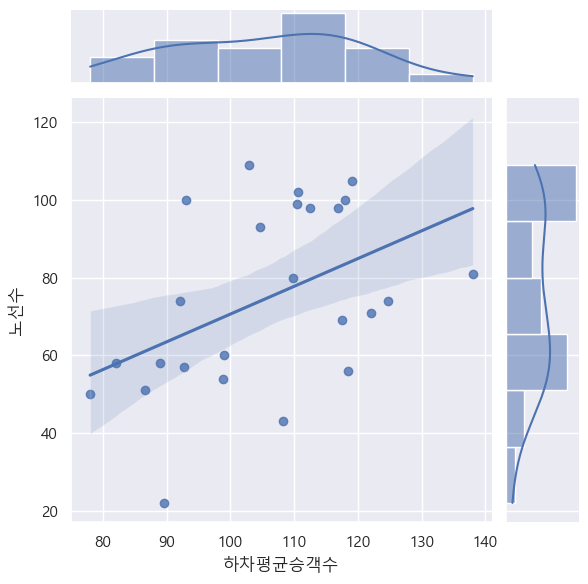

In [241]:
feature = '하차평균승객수'
t_chk(feature, target, df)

상관계수:0.4759066764458364, P_value:0.016186867803679693


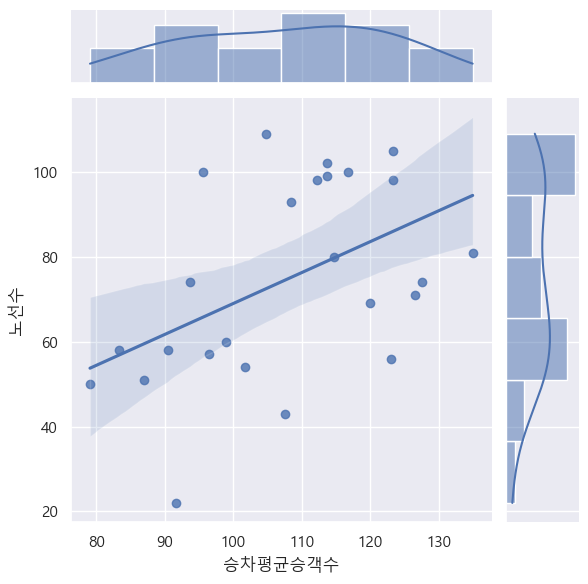

In [242]:
feature = '승차평균승객수'
t_chk(feature, target, df)

상관계수:0.6818200903353782, P_value:0.0001744480772107051


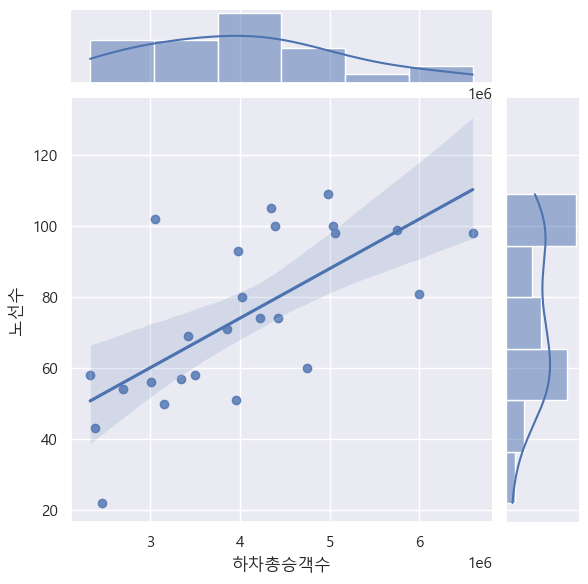

In [243]:
feature = '노선수'
t_chk(feature, target, df)

In [303]:
target = '노선수'

상관계수:0.2778251073363912, P_value:0.17873581772302652


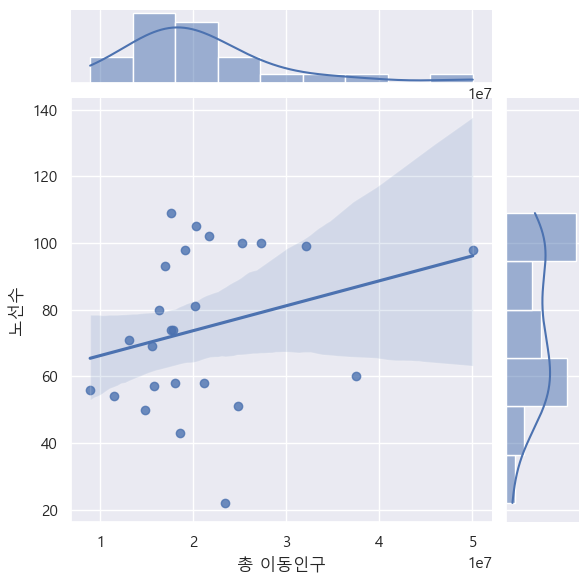

In [305]:
feature = '총 이동인구'
t_chk(feature, target, df)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   남자                 25 non-null     int64  
 3   여자                 25 non-null     int64  
 4   합계                 25 non-null     int64  
 5   한식 일반 음식점업         25 non-null     object 
 6   한식 일반 음식점업.1       25 non-null     object 
 7   커피전문점              25 non-null     object 
 8   커피전문점.1            25 non-null     object 
 9   일반 교과 학원           25 non-null     object 
 10  일반 교과 학원.1         25 non-null     object 
 11  한식 육류요리 전문점        25 non-null     int64  
 12  한식 육류요리 전문점.1      25 non-null     object 
 13  남녀용 겉옷 및 셔츠 도매업    25 non-null     object 
 14  남녀용 겉옷 및 셔츠 도매업.1  25 non-null     object 
 15  부동산 중개 및 대리업       25 non-null     object 
 16  부동산 중개 및 대리업.1     25 non-nu

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [80]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df.corr(), annot = True)
plt.show()

ValueError: could not convert string to float: '강남구'

In [183]:
# 데이터 스케일링
import numpy as np
from sklearn.preprocessing import minmax_scale

In [186]:
# 종사자 수 구분 # 데이터 스케일링
for column in df.columns[2::]:
    mean = np.mean(df[column])
    std = np.std(df[column])
    df[column] = (df[column] - mean) / std

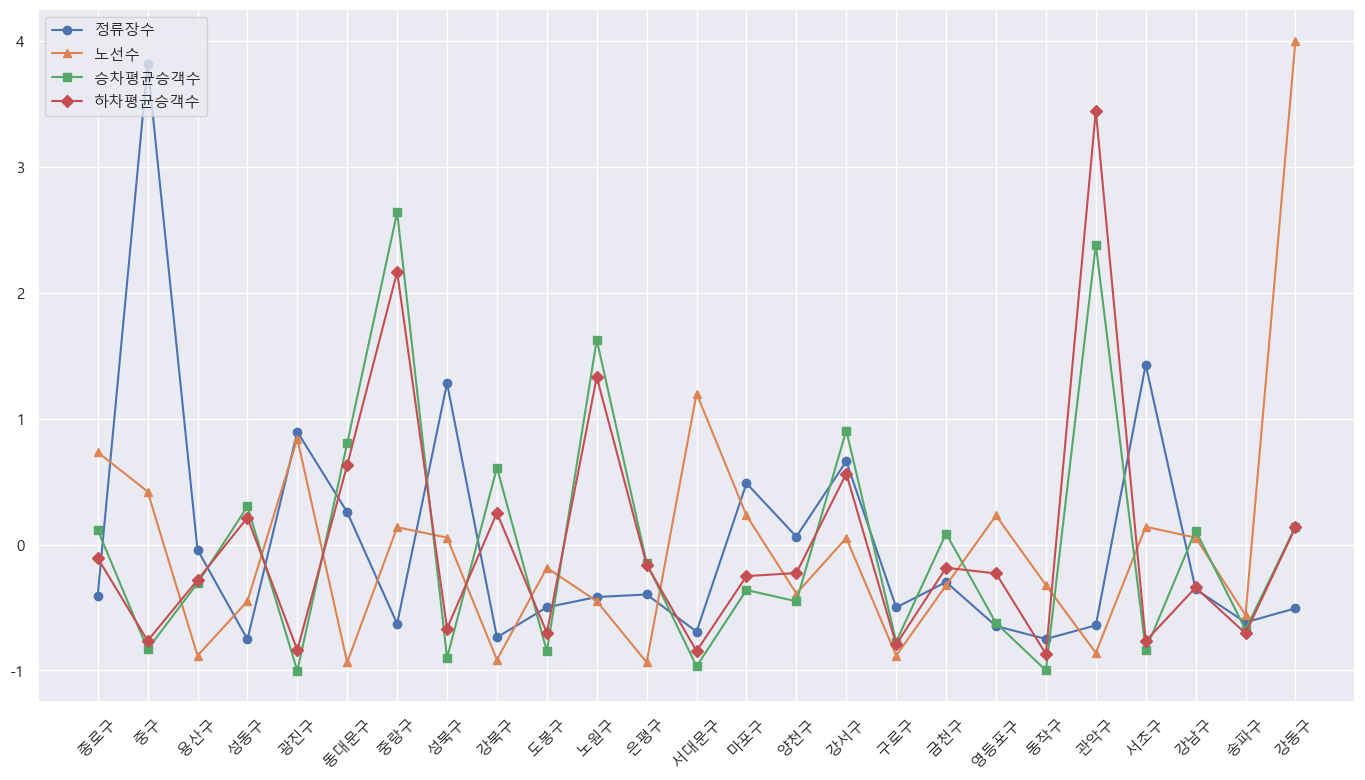

In [187]:
plt.figure(figsize=(17, 9))
plt.plot('자치구', '정류장수', marker='o', label='정류장수', data=df)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '노선수', marker='^', label='노선수', data=df)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '승차평균승객수', marker='s', label='승차평균승객수', data=df)
plt.xticks(rotation=45)
plt.grid(axis='x')

plt.plot('자치구', '하차평균승객수', marker='D', label='하차평균승객수', data=df)
plt.xticks(rotation=45)
plt.grid(axis='x')

#plt.bar('자치구', '합계', data=df, label='인구 수')

plt.legend(loc='upper left')
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.